In [37]:
import numpy as np
import math as mh
import orix
import matplotlib.pyplot as plt

from operator import itemgetter
from matplotlib import colormaps

from MyFunctions_rotation import schmid_factor, from_Rotation_to_ProperEuler_Matrix_orientation, rotation_line, compute_rotations_axis, rotation_orientations, create_misorientation_matrice
from orix import plot, sampling
from orix.crystal_map import Phase
from orix.quaternion import Orientation, Rotation, symmetry, Quaternion
from orix.vector import Miller, Vector3d
from diffpy.structure import Atom, Lattice, Structure
from orix.quaternion.symmetry import Oh

from orix.io import plugins

In [38]:
#Paramètres figures

plt.rcParams.update(
    {
        "figure.figsize": (10, 10),
        "figure.facecolor":"w",
        "font.size": 10,
        "axes.grid": True,
        "lines.markersize": 10,
        "lines.linewidth": 2,
    }
)


In [39]:
#PHASE TETRAGONALE

In [40]:
#test uvw direction normal to plane hkl 
    
maille=Lattice(3.2,3.2,8.47,90,90,120)
laue_group=symmetry.C3h
Hex=Phase(structure=Structure(lattice=maille),point_group=laue_group)

Mil=Miller(hkl=[1,0,0],phase=Hex)

print(Mil.hkl)
print(Mil.uvw)
print(Mil.hkil)




[[ 1.00000000e+00 -5.55111512e-17  0.00000000e+00]]
[[0.13020833 0.06510417 0.        ]]
[[ 1.00000000e+00 -5.55111512e-17 -1.00000000e+00  0.00000000e+00]]


In [41]:

maille=Lattice(3.61641153, 3.61641153, 5.20532880, 90, 90, 90)
laue_group=symmetry.D4h
Tetragonal = Phase(structure=Structure(lattice=maille),point_group=laue_group)


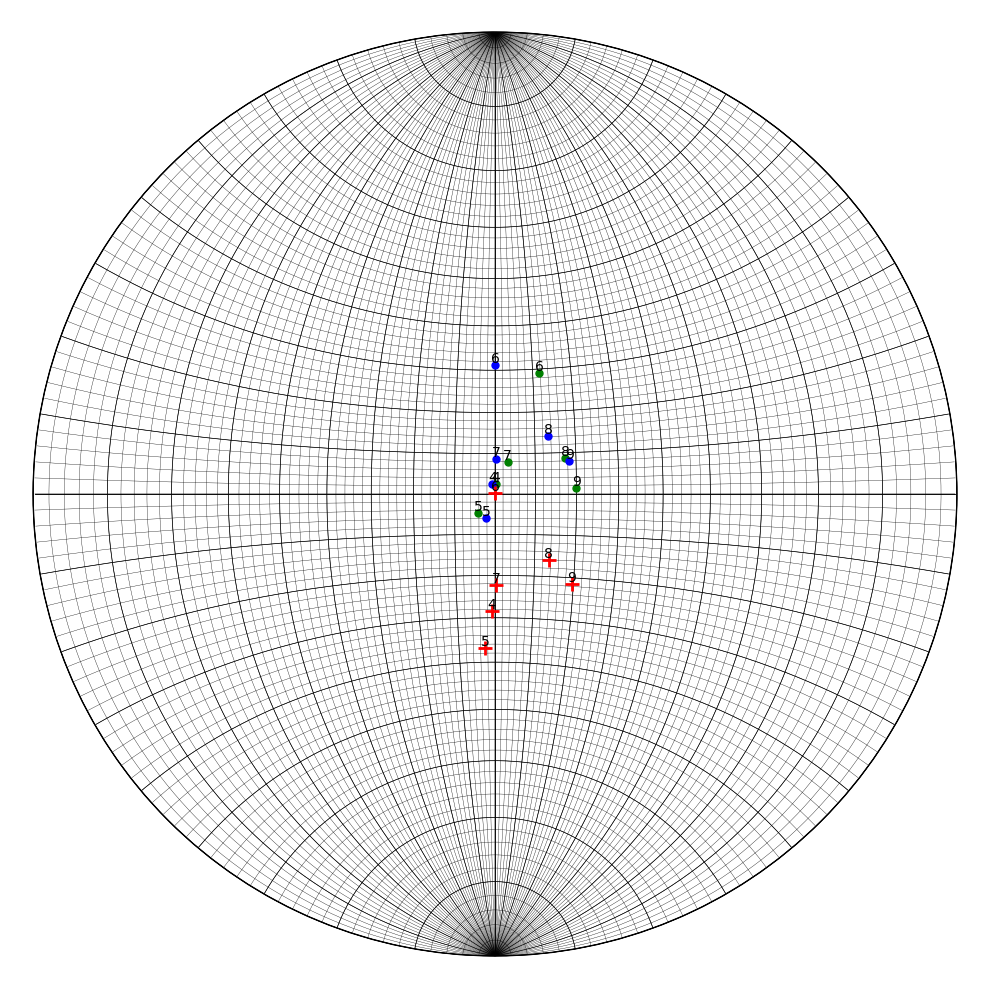

In [44]:
#Wulff 


n = int(92 / 2)  # Degree / net resolution
steps = 500
kwargs = dict(linewidth=0.25, color="k")

polar = np.linspace(0, 0.5 * np.pi, num=n)
v_right = Vector3d.from_polar(azimuth=np.zeros(n), polar=polar)
v_left = Vector3d.from_polar(azimuth=np.ones(n) * np.pi, polar=polar)
v010 = Vector3d.zero(shape=(n,))
v010.y = 1
v010_opposite = -v010

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="stereographic",hemisphere="upper"))
ax.stereographic_grid(False)
ax.draw_circle(v_right, steps=steps, **kwargs)
ax.draw_circle(v_left, steps=steps, **kwargs)
ax.draw_circle(v010, opening_angle=polar, steps=steps, **kwargs)
ax.draw_circle(v010_opposite, opening_angle=polar, steps=steps, **kwargs)


n = int(20 / 2)   # Degree / net resolution
steps = 500
kwargs = dict(linewidth=0.5, color="k")

polar = np.linspace(0, 0.5 * np.pi, num=n)
v_right = Vector3d.from_polar(azimuth=np.zeros(n), polar=polar)
v_left = Vector3d.from_polar(azimuth=np.ones(n) * np.pi, polar=polar)
v010 = Vector3d.zero(shape=(n,))
v010.y = 1
v010_opposite = -v010

ax.draw_circle(v_right, steps=steps, **kwargs)
ax.draw_circle(v_left, steps=steps, **kwargs)
ax.draw_circle(v010, opening_angle=polar, steps=steps, **kwargs)
ax.draw_circle(v010_opposite, opening_angle=polar, steps=steps, **kwargs)


        
Origine=Vector3d.from_polar(azimuth=0, polar=0)


#### ANgle alpha beta du TEM


Alpha=np.array([10.25,3.14,17.15,19.98,0.23,-4.12])  #polar
Beta=np.array([29.59,8.03,9.18,1.48,2.53,-4.84])  #azimuth
Points=np.array(["6","7","8","9","4","5"])
vectors=[]

for i in range(len(Alpha)):
    r_polar=Rotation.from_axes_angles([0, -1, 0], Alpha[i], degrees=True)
    r_azimuth=Rotation.from_axes_angles([1, 0, 0], Beta[i], degrees=True)
    vect=~r_azimuth * ~r_polar  * Origine
    vectors.append(vect)
    vect.scatter(figure=fig,vector_labels=Points[i],c="g",marker=".")

    

rotated_vectors1=[]

#indice=np.where(Points==Zone_Axis_nb)
#ind=indice[0]



rot1=Rotation.from_axes_angles([0, 0, 1], 20,degrees=True)

for i in range(len(Alpha)):
    vect=rot1 * vectors[i]
    rotated_vectors1.append(vect)
    vect.scatter(figure=fig,vector_labels=Points[i],c="b",marker=".")
    
rotated_vectors2=[]

rot2=Rotation.from_axes_angles([1, 0, 0], -31,degrees=True)
for i in range(len(Alpha)):
    vect=~rot2 * rotated_vectors1[i]
    rotated_vectors2.append(vect)
    vect.scatter(figure=fig,vector_labels=Points[i],c="r",marker="+")    


fig.tight_layout()

In [45]:
#Paramètres figures
plt.rcParams.update(
    {
        "figure.figsize": (10, 10),
        "figure.facecolor":"w",
        "font.size": 10,
        "axes.grid": True,
        "lines.markersize": 10,
        "lines.linewidth": 2,
    }
)


''

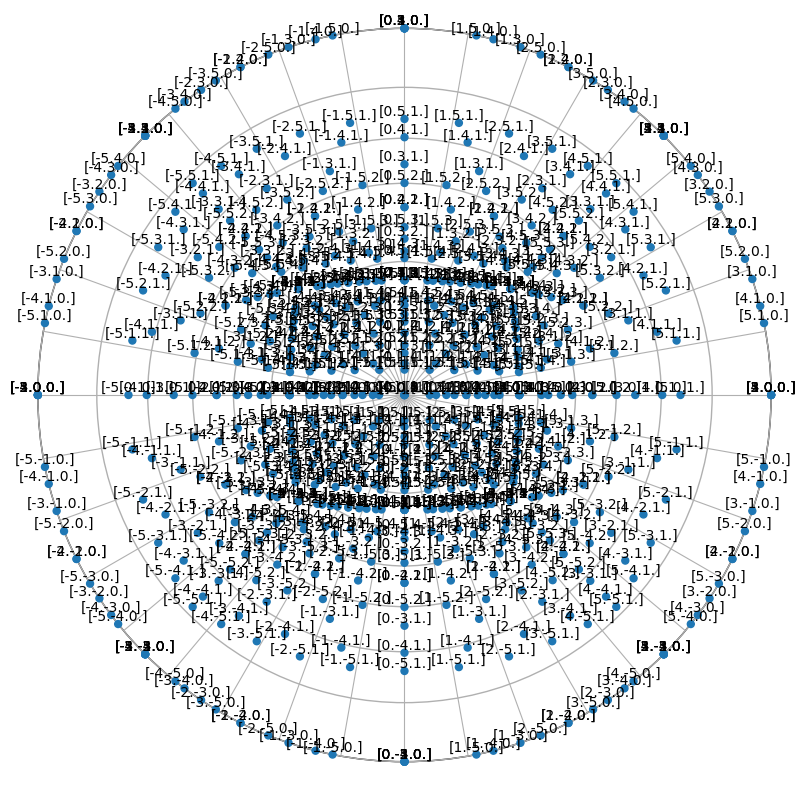

In [54]:
#Tracer des poles sur la projection stereo (si criteria==all, tous les poles de -max indice à +max indice, sinon, uniquement ceux dans Tab)

criteria="all" #"all" or "selected"

max_indice=5
min_indice=-5

Selection=[]
Selection.append([-1,3,1])
Selection.append([-3,5,4])
Selection.append([-2,4,1])
Selection.append([-2,3,2])
Selection.append([-1,1,0])
Selection.append([-2,5,4])

#dir=Vector3d([[1, 1, 0], [0, 0, 1],[1,-1,0]])


if criteria== "all":
    hkl_list=[]
    for h in range(min_indice,max_indice+1):
        for k in range(min_indice,max_indice+1):
            for l in range(min_indice,max_indice+1): 
                hkl_list.append([h,k,l])
            
if criteria=="selected":
    hkl_list=[]
    for h in range(min_indice,max_indice+1):
        for k in range(min_indice,max_indice+1):
            for l in range(min_indice,max_indice+1):
                if [h,k,l] in Selection:
                    hkl_list.append([h,k,l])


Miller_list=Miller(uvw=hkl_list,phase=Tetragonal)


#dir = Vector3d(([0,0,1],[-1,1,0],[1,1,0]))  # les directions cristallo h k lvers lesquels les reference echantillons pointes. Elles ont été définies comme Axe_1 Axe_2 et Axe 3
Miller_list.scatter(vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.uvw],marker=".")

,

In [55]:
#Identification d'un axe de zone

Zone_Axis_nb="6"
zoneaxis=[1,1,0]
Zone_Axis=Miller(uvw=zoneaxis,phase=Tetragonal)
o=Orientation(Zone_Axis,laue_group)

print(Zone_Axis.uvw)
print(Zone_Axis.hkl)

[[1. 1. 0.]]
[[13.07843235 13.07843235  0.        ]]


90.0
[ 1. -1.  0.]


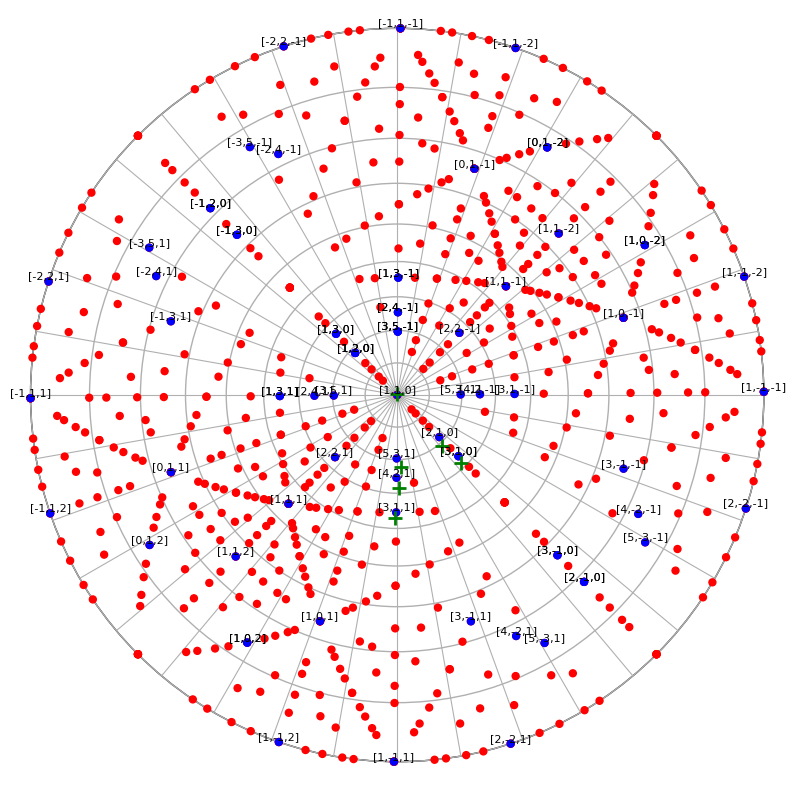

In [60]:
#La projection stéréographique est représenté selon le pole 001 par défaut. Ici on la "tourne" pour l'avoir selon l'axe de zone repéré


vect_za=Zone_Axis.uvw[0]
vect_or=[0,0,1] #pole selon lequel la preojection stereo est représenté par défaut
miller_origine=Miller(uvw=vect_or,phase=Tetragonal)

vect_origine=miller_origine.uvw[0]

theta=mh.acos(np.dot(vect_za,vect_origine)/(np.linalg.norm(vect_origine)*np.linalg.norm(vect_za)))*180/np.pi

print(theta)
axis=np.cross(vect_za,vect_origine)
print(axis)

r=Rotation.from_axes_angles(axis, theta, degrees=True)
hkl_list_rotated=[]
Miller_list_rotated=r * Miller(uvw=hkl_list,phase=Tetragonal)

#dir = Vector3d(([0,0,1],[-1,1,0],[1,1,0]))  # les directions cristallo h k lvers lesquels les reference echantillons pointes. Elles ont été définies comme Axe_1 Axe_2 et Axe 3
fig_stereo=Miller_list_rotated.scatter(return_figure=True, text_kwargs=dict(size=8),marker=".",c="r",hemisphere="upper") #vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]

#vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]

liste_interet=[[5,-3,1],[3,-5,1],[3,5,1],[-3,5,1],[-3,-5,1],[-5,-3,1],[-3,-5,1],[-5,3,1],[5,3,1],[-1,0,2],[1,0,2],[0,-1,2],[1,0,2],[0,-1,2],[-1,0,2],[0,1,2],[1,-1,1],[-1,1,1],[-1,-1,1],[1,1,1]]
liste_interet=liste_interet+[[-1,3,0],[1,3,0],[-1,-3,0],[3,1,0],[1,-3,0],[3,-1,0],[3,1,0],[-3,1,0],[1,-1,2],[-1,1,2],[1,1,2],[-1,-1,2],[2,-2,1],[-2,2,1],[-2,-2,1],[2,2,1]]
liste_interet=liste_interet+[[-2,1,0],[-1,-2,0],[1,-2,0],[-1,2,0],[1,2,0],[2,1,0],[2,-1,0]]
liste_interet=liste_interet+[[-1,-3,1],[-3,1,1],[3,1,1],[-3,-1,1],[-1,3,1],[3,-1,1],[1,3,1],[0,-1,1],[-1,0,1],[1,0,1],[0,1,1]]
liste_interet=liste_interet+[[-2,-4,1],[-4,-2,1],[2,-4,1],[2,4,1],[-4,2,1],[-2,4,1],[4,-2,1],[4,2,1]]
liste_interet_neg=np.dot(-1,liste_interet)
liste_interet_neg=liste_interet_neg.tolist()
liste_interet=liste_interet+liste_interet_neg

liste_interet.append([1,1,0])
liste_interet.append([3,5,-1])
liste_interet.append([1,3,-1])
liste_interet.append([1,3,1])
liste_interet.append([1,2,0])
liste_interet.append([2,4,-1])



Miller_interet=r* Miller(uvw=liste_interet, phase=Tetragonal)
Miller_interet.scatter(figure=fig_stereo, text_kwargs=dict(size=8),vector_labels=[str(vi).replace(" ", "") for vi in liste_interet],marker=".",c="b") #vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]


for i in range(len(rotated_vectors2)):
    vect=rotated_vectors2[i]
    #vect.scatter(figure=fig_stereo,vector_labels=Points[i],c="k",marker="+")    


rotated_vectors3=[]


rot_ultime=Rotation.from_axes_angles([0, 0, 1], 2.5,degrees=True) #190

for i in range(len(rotated_vectors2)):
    vect=rot_ultime * rotated_vectors2[i]
    rotated_vectors3.append(vect)
    vect.scatter(figure=fig_stereo,c="g",marker="+")
    
#for i in range(len(Points)):
#    for k in range(len(hkl_list)):
#        ind, val = min(np.linalg.norm(Miller_list_rotated[k].xyz-np.linalg.norm(rotated_vectors2[i])))
#        print(Points[i], "is close to ZA",Miller_list[ind].hkl)


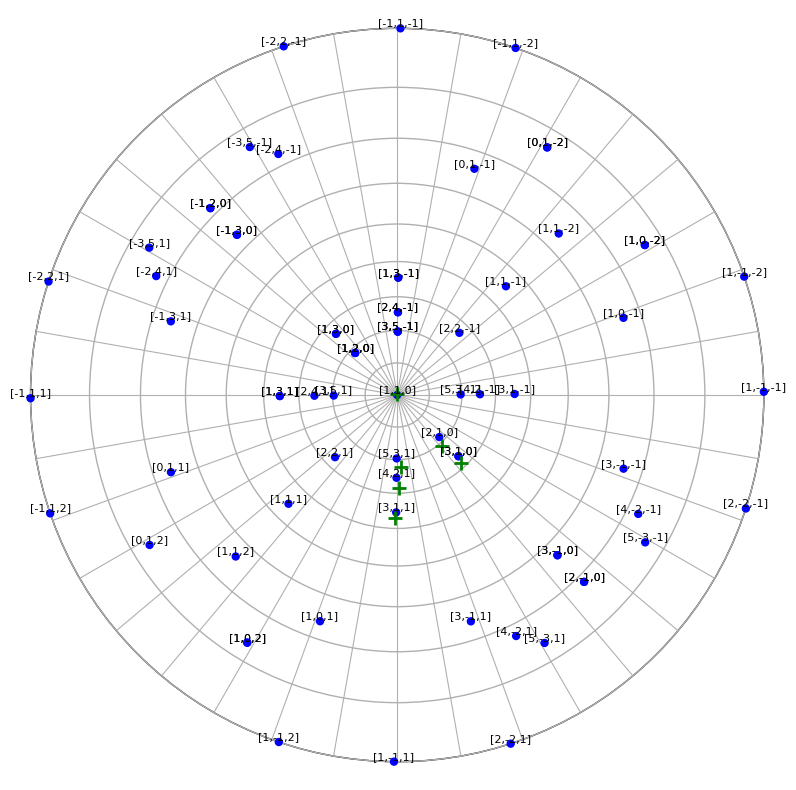

In [61]:
fig_stereo=Miller_interet.scatter(return_figure=True, text_kwargs=dict(size=8),vector_labels=[str(vi).replace(" ", "") for vi in liste_interet],marker=".",c="b") #vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]


for i in range(len(rotated_vectors2)):
    vect=rotated_vectors2[i]
    #vect.scatter(figure=fig_stereo,vector_labels=Points[i],c="k",marker="+")    


rotated_vectors3=[]


rot_ultime=Rotation.from_axes_angles([0, 0, 1], 2.5,degrees=True)

for i in range(len(rotated_vectors2)):
    vect=rot_ultime * rotated_vectors2[i]
    rotated_vectors3.append(vect)
    vect.scatter(figure=fig_stereo,c="g",marker="+")

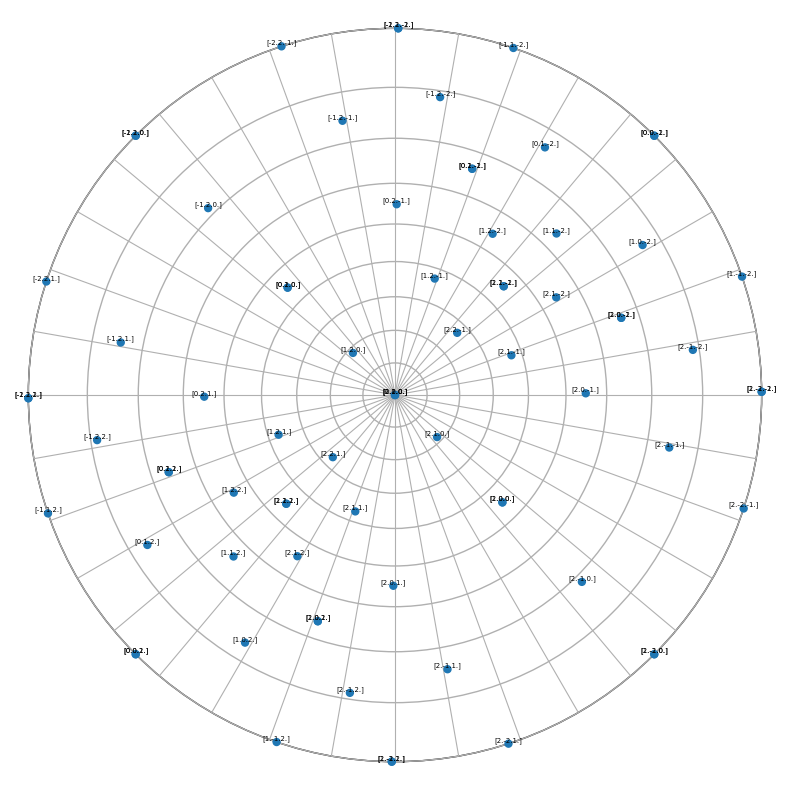

In [16]:
fig_stereo=Miller_list_rotated.scatter(return_figure=True,vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.uvw], text_kwargs=dict(size=5),marker=".") #vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]





In [17]:
#PHASE MONOCLINIC

In [62]:
maille2=Lattice(5.145, 5.2075, 5.3107, 90, 99.23, 90)
laue_group2=symmetry.C2h
Monoclinique = Phase(structure=Structure(lattice=maille2),point_group=laue_group2)


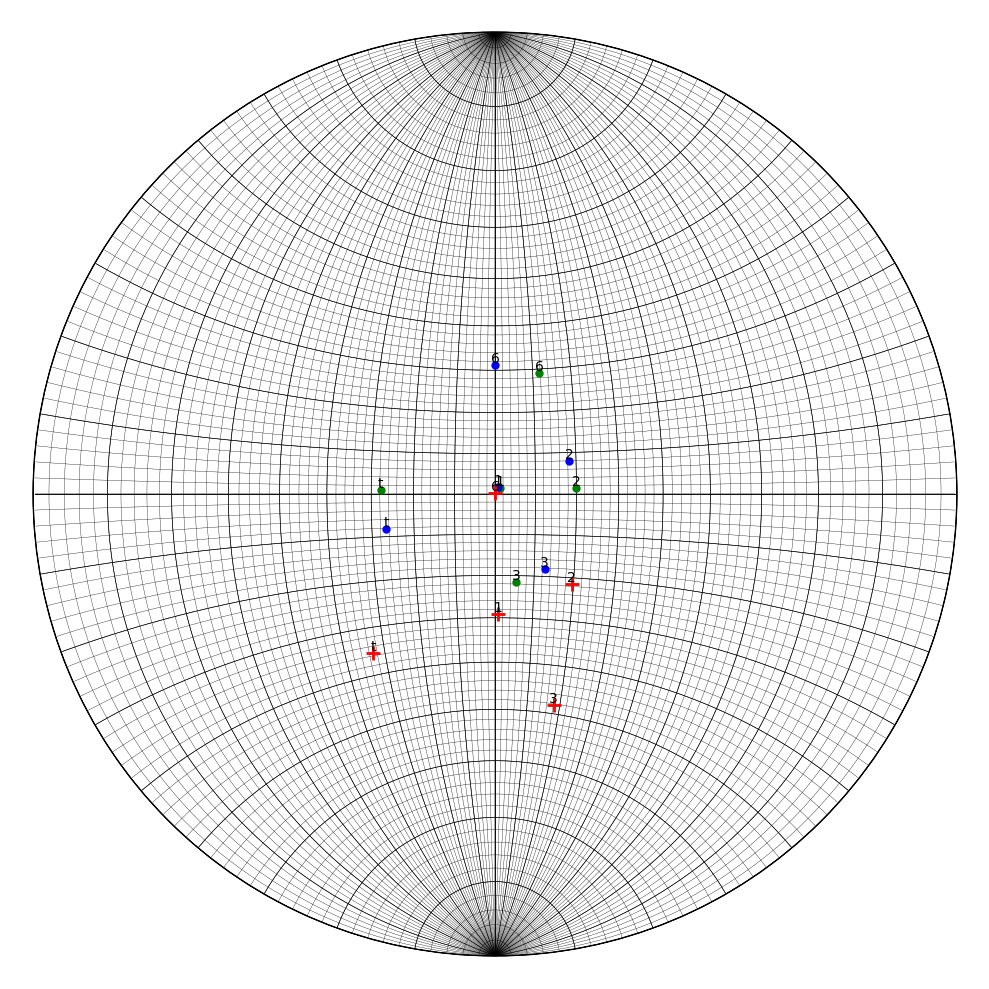

In [63]:
#Wulff 


n = int(92 / 2)  # Degree / net resolution
steps = 500
kwargs = dict(linewidth=0.25, color="k")

polar = np.linspace(0, 0.5 * np.pi, num=n)
v_right = Vector3d.from_polar(azimuth=np.zeros(n), polar=polar)
v_left = Vector3d.from_polar(azimuth=np.ones(n) * np.pi, polar=polar)
v010 = Vector3d.zero(shape=(n,))
v010.y = 1
v010_opposite = -v010

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="stereographic",hemisphere="upper"))
ax.stereographic_grid(False)
ax.draw_circle(v_right, steps=steps, **kwargs)
ax.draw_circle(v_left, steps=steps, **kwargs)
ax.draw_circle(v010, opening_angle=polar, steps=steps, **kwargs)
ax.draw_circle(v010_opposite, opening_angle=polar, steps=steps, **kwargs)


n = int(20 / 2)   # Degree / net resolution
steps = 500
kwargs = dict(linewidth=0.5, color="k")

polar = np.linspace(0, 0.5 * np.pi, num=n)
v_right = Vector3d.from_polar(azimuth=np.zeros(n), polar=polar)
v_left = Vector3d.from_polar(azimuth=np.ones(n) * np.pi, polar=polar)
v010 = Vector3d.zero(shape=(n,))
v010.y = 1
v010_opposite = -v010

ax.draw_circle(v_right, steps=steps, **kwargs)
ax.draw_circle(v_left, steps=steps, **kwargs)
ax.draw_circle(v010, opening_angle=polar, steps=steps, **kwargs)
ax.draw_circle(v010_opposite, opening_angle=polar, steps=steps, **kwargs)


        
Origine=Vector3d.from_polar(azimuth=0, polar=0)
        
Alpha=np.array([1.3,19.9,5.03,10.25,-27.84])  #polar
Beta=np.array([1.48,1.48,-21.56,29.59,1.15])  #azimuth
Points=np.array(["1","2","3","6","t"])
vectors=[]

for i in range(len(Alpha)):
    r_polar=Rotation.from_axes_angles([0, -1, 0], Alpha[i], degrees=True)
    r_azimuth=Rotation.from_axes_angles([1, 0, 0], Beta[i], degrees=True)
    vect=~r_azimuth * ~r_polar  * Origine
    vectors.append(vect)
    vect.scatter(figure=fig,vector_labels=Points[i],c="g",marker=".")

    



rotated_vectors1=[]



rot1=Rotation.from_axes_angles([0, 0, 1], 20,degrees=True)

for i in range(len(Alpha)):
    vect=rot1 * vectors[i]
    rotated_vectors1.append(vect)
    vect.scatter(figure=fig,vector_labels=Points[i],c="b",marker=".")
    
rotated_vectors2=[]

rot2=Rotation.from_axes_angles([1, 0, 0], -31,degrees=True)
for i in range(len(Alpha)):
    vect=~rot2 * rotated_vectors1[i]
    rotated_vectors2.append(vect)
    vect.scatter(figure=fig,vector_labels=str(Points[i]),c="r",marker="+")    


fig.tight_layout()

In [64]:
#Paramètres figures
plt.rcParams.update(
    {
        "figure.figsize": (10, 10),
        "figure.facecolor":"w",
        "font.size": 10,
        "axes.grid": True,
        "lines.markersize": 10,
        "lines.linewidth": 2,
    }
)


''

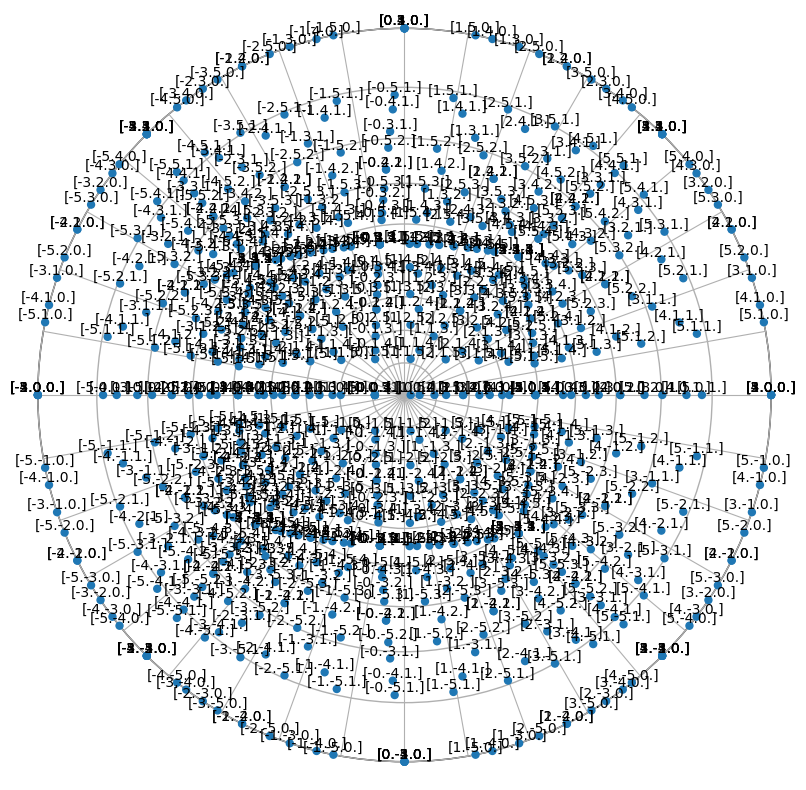

In [65]:
#Tracer des poles sur la projection stereo (si criteria==all, tous les poles de -max indice à +max indice, sinon, uniquement ceux dans Tab)

criteria="all" #"all" or "selected"

max_indice=5
min_indice=-5

Selection=[]
#Selection.append([-1,3,1])
#Selection.append([-3,5,4])
#Selection.append([-2,4,1])
#Selection.append([-2,3,2])
#Selection.append([-1,1,0])
#Selection.append([-2,5,4])

#dir=Vector3d([[1, 1, 0], [0, 0, 1],[1,-1,0]])


if criteria== "all":
    hkl_list=[]
    for h in range(min_indice,max_indice+1):
        for k in range(min_indice,max_indice+1):
            for l in range(min_indice,max_indice+1):
                if h!=0 or k!=0 or l!=0:
                    hkl_list.append([h,k,l])
            
if criteria=="selected":
    hkl_list=[]
    for h in range(min_indice,max_indice+1):
        for k in range(min_indice,max_indice+1):
            for l in range(min_indice,max_indice+1):
                if [h,k,l] in Selection:
                    hkl_list.append([h,k,l])


Miller_list=Miller(uvw=hkl_list,phase=Monoclinique)

#dir = Vector3d(([0,0,1],[-1,1,0],[1,1,0]))  # les directions cristallo h k lvers lesquels les reference echantillons pointes. Elles ont été définies comme Axe_1 Axe_2 et Axe 3
Miller_list.scatter(marker=".",vector_labels=[str(vi).replace(" ", "") for vi in  np.round(Miller_list.uvw,0)])#vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.uvw]

,

In [66]:
#Identification d'un axe de zone

Zone_Axis_nb="6"
zoneaxis=[0,-1,0]
Zone_Axis=Miller(uvw=zoneaxis,phase=Monoclinique)
o=Orientation(Zone_Axis,laue_group2)

print(Zone_Axis.uvw)
print(Zone_Axis.hkl)

[[ 0. -1.  0.]]
[[  0.         -27.11805625   0.        ]]


In [67]:
Miller_interet.round(5)

Miller (130,), point group 4/mmm, uvw
[[ 3. -5.  1.]
 [ 3. -5. -1.]
 [-1.  0.  2.]
 [-5.  3.  1.]
 [ 0. -1. -2.]
 [-1.  0. -2.]
 [ 0. -1. -2.]
 [-5.  3. -1.]
 [ 0. -1.  2.]
 [-5. -3. -1.]
 [-3. -5.  1.]
 [-3. -5. -1.]
 [-3. -5.  1.]
 [-3. -5. -1.]
 [-5. -3. -1.]
 [-5. -3.  1.]
 [ 0. -1.  0.]
 [-1.  0.  0.]
 [-1. -1. -1.]
 [-1. -1.  1.]
 [-2.  2.  1.]
 [-1.  1.  2.]
 [ 1. -1. -2.]
 [ 1. -1.  2.]
 [ 2. -2. -1.]
 [ 2. -2.  1.]
 [ 1. -1.  2.]
 [-2.  2. -1.]
 [-1. -3.  0.]
 [-3. -1.  0.]
 [-2. -2.  1.]
 [-2. -2. -1.]
 [ 1. -3.  0.]
 [-3.  1.  0.]
 [-1. -1. -2.]
 [-1. -1.  2.]
 [-3.  3. -1.]
 [ 1. -1. -3.]
 [ 3. -3. -1.]
 [-3.  3.  1.]
 [-1.  1.  3.]
 [ 1. -1.  3.]
 [ 3. -3.  1.]
 [ 0. -1. -1.]
 [-3.  1. -1.]
 [ 0. -1.  1.]
 [-1.  0. -1.]
 [-3.  1.  1.]
 [ 1. -3.  1.]
 [-1.  0.  1.]
 [-1. -3. -1.]
 [-3. -1. -1.]
 [-1. -3.  1.]
 [-3. -1.  1.]
 [ 0. -2. -3.]
 [-2.  0. -3.]
 [ 2. -4. -1.]
 [-2.  0.  3.]
 [-4.  2. -1.]
 [-4.  2.  1.]
 [ 2. -4.  1.]
 [ 0. -2.  3.]
 [-3.  5. -1.]
 [-3.  5.  1.]
 [

90.0
[-1.00000000e+00 -0.00000000e+00 -5.27212029e-18]


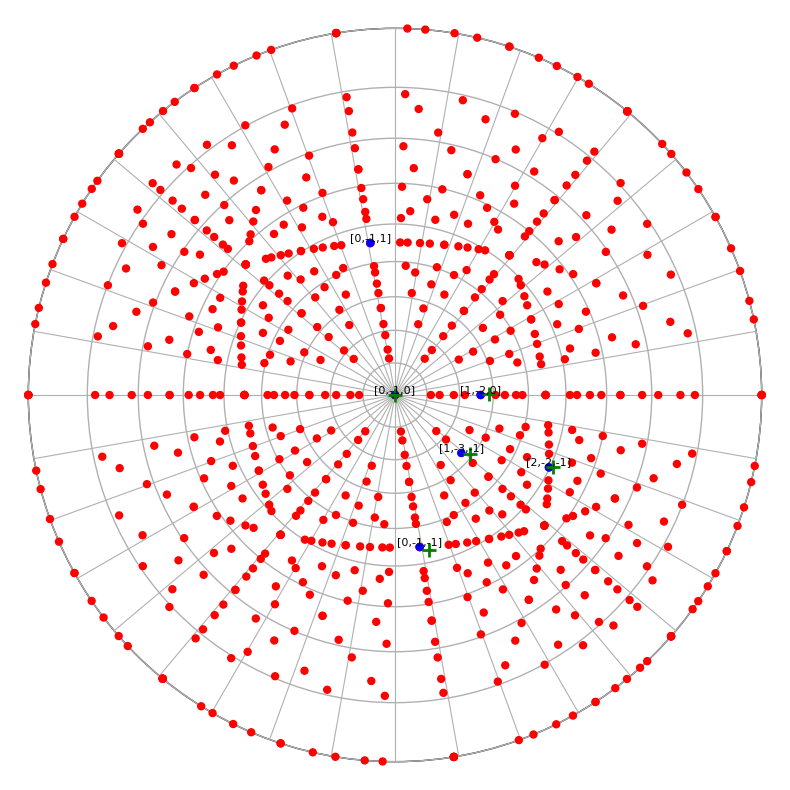

In [68]:
#La projection stéréographique est représenté selon le pole 001 par défaut. Ici on la "tourne" pour l'avoir selon l'axe de zone repéré


vect_za=Zone_Axis.uvw[0]
vect_or=[0,0,1] #pole selon lequel la preojection stereo est représenté par défaut
miller_origine=Miller(uvw=vect_or,phase=Monoclinique)

vect_origine=miller_origine.uvw[0]

theta=mh.acos(np.dot(vect_za,vect_origine)/(np.linalg.norm(vect_origine)*np.linalg.norm(vect_za)))*180/np.pi

print(theta)
axis=np.cross(vect_za,vect_origine)
print(axis)

r=Rotation.from_axes_angles(axis, theta, degrees=True)
hkl_list_rotated=[]
Miller_list_rotated=r * Miller(uvw=hkl_list,phase=Monoclinique)

#dir = Vector3d(([0,0,1],[-1,1,0],[1,1,0]))  # les directions cristallo h k lvers lesquels les reference echantillons pointes. Elles ont été définies comme Axe_1 Axe_2 et Axe 3
fig_stereo=Miller_list_rotated.scatter(return_figure=True, text_kwargs=dict(size=8),marker=".",c="r",hemisphere="upper") #vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]

#vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]
liste_interet=[[0,-1,0]]
liste_interet=liste_interet+[[0,-1,1],[0,1,1]]
liste_interet_neg=np.dot(-1,liste_interet)
liste_interet_neg=liste_interet_neg.tolist()
liste_interet=liste_interet+liste_interet_neg

liste_interet.append([2,-2,-1])
liste_interet.append([1,-2,0])
liste_interet.append([1,-3,-1])
#liste_interet.append([0,-2,-2])
#liste_interet.append([1,2,0])
#liste_interet.append([2,4,-1])

Miller_interet=r* Miller(uvw=liste_interet, phase=Monoclinique)
#Miller_interet=Miller_interet.symmetrise(unique=True)
Miller_interet.scatter(figure=fig_stereo, text_kwargs=dict(size=8),vector_labels=[str(vi).replace(" ", "") for vi in liste_interet],marker=".",c="b") #vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]


for i in range(len(rotated_vectors2)):
    vect=rotated_vectors2[i]
    #vect.scatter(figure=fig_stereo,vector_labels=Points[i],c="k",marker="+")    


rotated_vectors3=[]


rot_ultime=Rotation.from_axes_angles([0, 0, 1], 50,degrees=True) #190

for i in range(len(rotated_vectors2)):
    vect=rot_ultime * rotated_vectors2[i]
    rotated_vectors3.append(vect)
    vect.scatter(figure=fig_stereo,c="g",marker="+")
    
#for i in range(len(Points)):
#    for k in range(len(hkl_list)):
#        ind, val = min(np.linalg.norm(Miller_list_rotated[k].xyz-np.linalg.norm(rotated_vectors2[i])))
#        print(Points[i], "is close to ZA",Miller_list[ind].hkl)


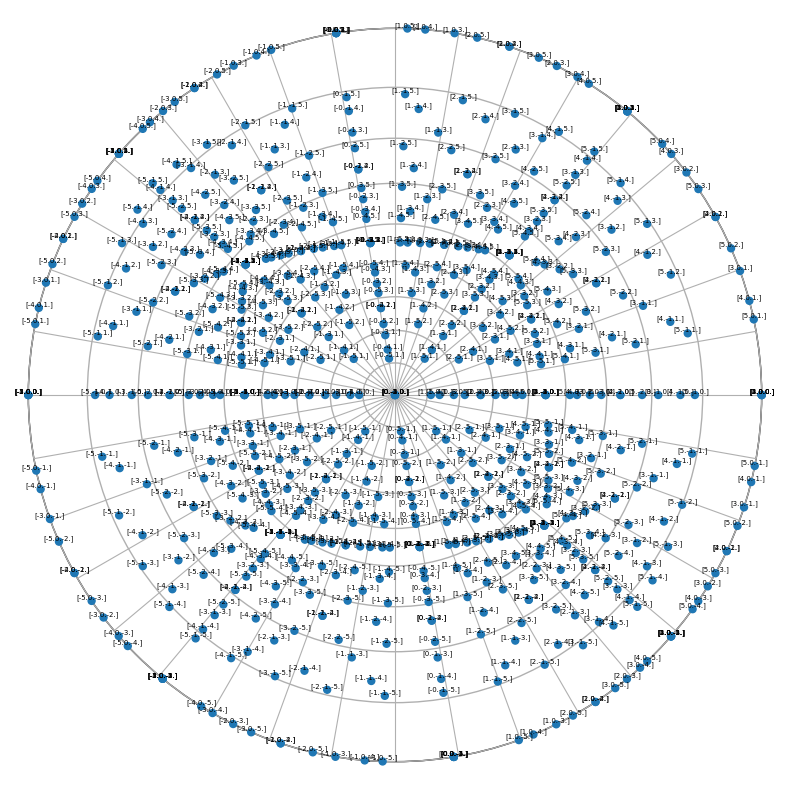

In [69]:
fig_stereo=Miller_list_rotated.scatter(return_figure=True,vector_labels=[str(vi).replace(" ", "") for vi in  np.round(Miller_list.uvw,0)], text_kwargs=dict(size=5),marker=".") #vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]


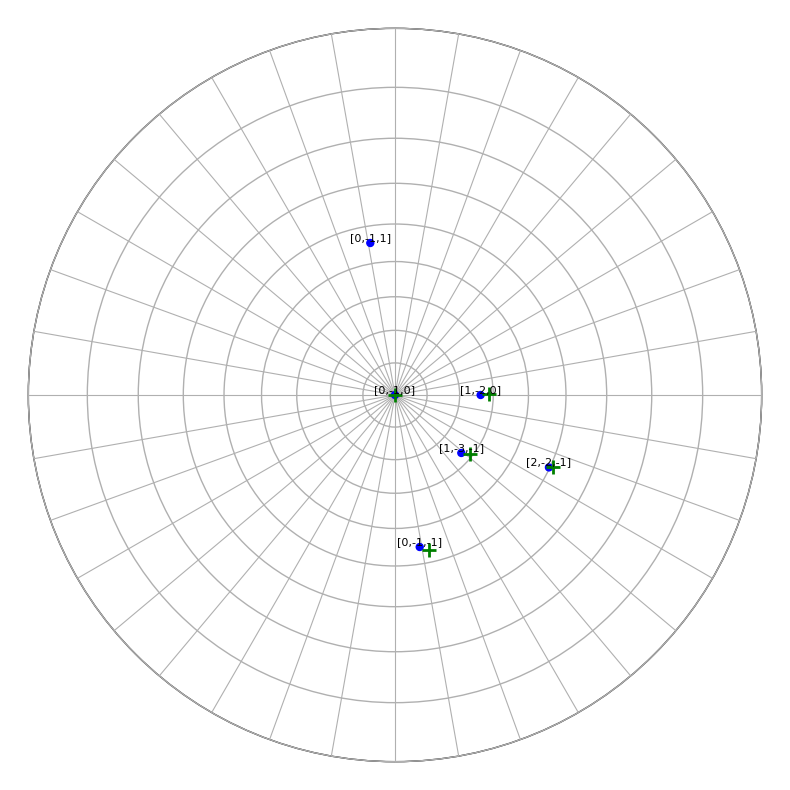

In [70]:
fig_stereo=Miller_interet.scatter(return_figure=True, text_kwargs=dict(size=8),vector_labels=[str(vi).replace(" ", "") for vi in liste_interet],marker=".",c="b") #vector_labels=[str(vi).replace(" ", "") for vi in Miller_list.hkl]


for i in range(len(rotated_vectors2)):
    vect=rotated_vectors2[i]
    #vect.scatter(figure=fig_stereo,vector_labels=Points[i],c="k",marker="+")    


rotated_vectors3=[]


rot_ultime=Rotation.from_axes_angles([0, 0, 1], 50,degrees=True)

for i in range(len(rotated_vectors2)):
    vect=rot_ultime * rotated_vectors2[i]
    rotated_vectors3.append(vect)
    vect.scatter(figure=fig_stereo,c="g",marker="+")

In [ ]:
m=14

print("System (",probable_glide_system[m][1],")<",probable_glide_system[m][2],"> avec un facteur de schmid de:",np.round(probable_glide_system[m][3],2), "et un axe de rotation de:",Miller(hkl=probable_glide_system[m][4],phase=heusler).round(10).hkl, "L'angle des bandes de glissement est", probable_glide_system[m][6],"degrés.")
Pillar_orientation=Orientation.from_matrix(Mat_Rot_SC) # Rotation from Sample frame to Crystal frame
~Pillar_orientation #this is the rotation from crystal to sample frame


#IPF //X


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[0])
orientations.symmetry=ipfkey.symmetry
rgb_x = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-26, 360+37):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)



#IPF //Y


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[1])
orientations.symmetry=ipfkey.symmetry
rgb_y = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-30, 360+16):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)

    
#IPF //Z


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[2])
orientations.symmetry=ipfkey.symmetry
rgb_z = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-11, 360+48):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)





In [ ]:
m=26

print("System (",probable_glide_system[m][1],")<",probable_glide_system[m][2],"> avec un facteur de schmid de:",np.round(probable_glide_system[m][3],2), "et un axe de rotation de:",Miller(hkl=probable_glide_system[m][4],phase=heusler).round(10).hkl, "L'angle des bandes de glissement est", probable_glide_system[m][6],"degrés.")
Pillar_orientation=Orientation.from_matrix(Mat_Rot_SC) # Rotation from Sample frame to Crystal frame
~Pillar_orientation #this is the rotation from crystal to sample frame


#IPF //X


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[0])
orientations.symmetry=ipfkey.symmetry
rgb_x = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-20, 360+18):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)



#IPF //Y


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[1])
orientations.symmetry=ipfkey.symmetry
rgb_y = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-15, 360+43):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)

    
#IPF //Z


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[2])
orientations.symmetry=ipfkey.symmetry
rgb_z = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-360, 360+360):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)





In [ ]:
m=18

print("System (",probable_glide_system[m][1],")<",probable_glide_system[m][2],"> avec un facteur de schmid de:",np.round(probable_glide_system[m][3],2), "et un axe de rotation de:",Miller(hkl=probable_glide_system[m][4],phase=heusler).round(10).hkl, "L'angle des bandes de glissement est", probable_glide_system[m][6],"degrés.")
Pillar_orientation=Orientation.from_matrix(Mat_Rot_SC) # Rotation from Sample frame to Crystal frame
~Pillar_orientation #this is the rotation from crystal to sample frame


#IPF //X


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[0])
orientations.symmetry=ipfkey.symmetry
rgb_x = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-20, 360+30):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)



#IPF //Y


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[1])
orientations.symmetry=ipfkey.symmetry
rgb_y = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-40, 360+23):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)

    
#IPF //Z


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[2])
orientations.symmetry=ipfkey.symmetry
rgb_z = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-115, 360+48):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)





In [ ]:
m=25

print("System (",probable_glide_system[m][1],")<",probable_glide_system[m][2],"> avec un facteur de schmid de:",np.round(probable_glide_system[m][3],2), "et un axe de rotation de:",Miller(hkl=probable_glide_system[m][4],phase=heusler).round(10).hkl, "L'angle des bandes de glissement est", probable_glide_system[m][6],"degrés.")
Pillar_orientation=Orientation.from_matrix(Mat_Rot_SC) # Rotation from Sample frame to Crystal frame
~Pillar_orientation #this is the rotation from crystal to sample frame


#IPF //X


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[0])
orientations.symmetry=ipfkey.symmetry
rgb_x = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-22, 360+18):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)



#IPF //Y


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[1])
orientations.symmetry=ipfkey.symmetry
rgb_y = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-13, 360+63):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)

    
#IPF //Z


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[2])
orientations.symmetry=ipfkey.symmetry
rgb_z = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-80, 360+22):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)




In [ ]:
m=27

print("System (",probable_glide_system[m][1],")<",probable_glide_system[m][2],"> avec un facteur de schmid de:",np.round(probable_glide_system[m][3],2), "et un axe de rotation de:",Miller(hkl=probable_glide_system[m][4],phase=heusler).round(10).hkl, "L'angle des bandes de glissement est", probable_glide_system[m][6],"degrés.")
Pillar_orientation=Orientation.from_matrix(Mat_Rot_SC) # Rotation from Sample frame to Crystal frame
~Pillar_orientation #this is the rotation from crystal to sample frame


#IPF //X


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[0])
orientations.symmetry=ipfkey.symmetry
rgb_x = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-180, 360+180):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)



#IPF //Y


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[1])
orientations.symmetry=ipfkey.symmetry
rgb_y = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-13, 360+63):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)

    
#IPF //Z


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[2])
orientations.symmetry=ipfkey.symmetry
rgb_z = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-80, 360+22):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)




In [ ]:
m=28

print("System (",probable_glide_system[m][1],")<",probable_glide_system[m][2],"> avec un facteur de schmid de:",np.round(probable_glide_system[m][3],2), "et un axe de rotation de:",Miller(hkl=probable_glide_system[m][4],phase=heusler).round(10).hkl, "L'angle des bandes de glissement est", probable_glide_system[m][6],"degrés.")
Pillar_orientation=Orientation.from_matrix(Mat_Rot_SC) # Rotation from Sample frame to Crystal frame
~Pillar_orientation #this is the rotation from crystal to sample frame


#IPF //X


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[0])
orientations.symmetry=ipfkey.symmetry
rgb_x = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-22, 360+18):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)



#IPF //Y


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[1])
orientations.symmetry=ipfkey.symmetry
rgb_y = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-13, 360+63):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)

    
#IPF //Z


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[2])
orientations.symmetry=ipfkey.symmetry
rgb_z = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-80, 360+22):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)




In [ ]:
m=29

print("System (",probable_glide_system[m][1],")<",probable_glide_system[m][2],"> avec un facteur de schmid de:",np.round(probable_glide_system[m][3],2), "et un axe de rotation de:",Miller(hkl=probable_glide_system[m][4],phase=heusler).round(10).hkl, "L'angle des bandes de glissement est", probable_glide_system[m][6],"degrés.")
Pillar_orientation=Orientation.from_matrix(Mat_Rot_SC) # Rotation from Sample frame to Crystal frame
~Pillar_orientation #this is the rotation from crystal to sample frame


#IPF //X


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[0])
orientations.symmetry=ipfkey.symmetry
rgb_x = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-22, 360+18):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_x, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)



#IPF //Y


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[1])
orientations.symmetry=ipfkey.symmetry
rgb_y = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-13, 360+63):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_y, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)

    
#IPF //Z


ipfkey = plot.IPFColorKeyTSL(laue_group,direction_sample[2])
orientations.symmetry=ipfkey.symmetry
rgb_z = ipfkey.orientation2color(orientations)
ma_fig=orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,return_figure=True)
for i in range(360-80, 360+22):
    new_orientation_list[m][i].scatter(projection="ipf",c="k", direction=ipfkey.direction,marker='.',edgecolors="black",linewidths=0.5,figure=ma_fig)
orientations.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='o',edgecolors="black",linewidths=0.5,figure=ma_fig)
Pillar_orientation.scatter(projection="ipf",c="r", direction=ipfkey.direction,marker='D',edgecolors="black",linewidths=0.5,figure=ma_fig)




In [ ]:
####TEST####

In [ ]:
List_index=[]
List_index.append([4,1,6])
List_index.append([-4,-5,-1])



In [ ]:
List_index_miller=Miller(hkl=List_index,phase=heusler)

#List_index_miller.symmetrise(unique=True)
#List_index_miller.symmetrise(unique=True).scatter(marker="*")
#List_index_miller.multiplicity




List_index_miller_sym, idx_equivalent_family = List_index_miller.symmetrise(unique=True, return_index=True)
List_index_miller_sym2, idx_equivalent_family2 = Miller_all.symmetrise(unique=True, return_index=True)

#ma_fig=List_index_miller_sym[idx_equivalent_family == 0].scatter(c="C0", return_figure=True)
#List_index_miller_sym[idx_equivalent_family == 1].scatter(c="C1", figure=ma_fig)
#List_index_miller_sym[idx_equivalent_family == 2].scatter(c="C2", figure=ma_fig)

ma_fig =List_index_miller_sym2.scatter(c="g",return_figure=True)
List_index_miller_sym[idx_equivalent_family == 0].scatter(c="C0", figure=ma_fig) # on trace la premiere famille pour définir la figure
for i in range(1, List_index_miller_sym.size): #c'est overkill, on trace plein de fois la même chose car il n'y a que 3 familles dans cet exemple
    List_index_miller_sym[idx_equivalent_family == i].scatter(c=f"C{i}", figure=ma_fig)


In [ ]:
List_index_miller_sym


In [ ]:
# ROTATION A GERER

In [ ]:
#Inverse pole figure

laue_group= symmetry.Oh
ipfkey = plot.IPFColorKeyTSL(laue_group)
ipfkey.plot()

In [ ]:
plt.rcParams["axes.grid"] = False #enlever la grille de la figure de Pole

direction = Vector3d(((1, 0, 0), (0, 1, 0), (0, 0, 1)))  # X, Y, Z ici ce sont les directions cristallo vers lesquels les reference echantillons pointes

#ori = Orientation.from_euler([325, 48, 163], laue_group, degrees=True) #En utilisant les angles d'Euler
#ori.scatter(projection="ipf", direction=direction)

list_ori=Orientation(List_index_miller_sym,laue_group) #en utilisant les indices de Miller
list_ori.symmetry=ipfkey.symmetry
rgb_z=ipfkey.orientation2color(list_ori)

list_ori.scatter(projection="ipf",c=rgb_z, direction=ipfkey.direction,marker='p',edgecolors="black",linewidths=0.5)


#plt.rcParams["axes.grid"] = False

#ori2 = Orientation.random(1000)
#for pg in pg_laue:
#    ipfkey = plot.IPFColorKeyTSL(pg)
#    ori2.symmetry = ipfkey.symmetry
#    rgb_z = ipfkey.orientation2color(ori2)
#    ori2.scatter("ipf", c=rgb_z, direction=ipfkey.direction)


In [ ]:
for i in range(0,3):
    print(i)

In [ ]:
A=np.array([[1,2,3],[0,1,1],[4,1,1]])
B=np.array([[1,0,1],[0,1,1],[1,3,1]])

In [ ]:
list2=[]
list2.append([1,2,3])
A[0][0]

In [ ]:
print(np.dot(B,A))

In [ ]:
A=[-1,0.682,0.547]
B=[-0.779,-1,-0.185]
C=[0.274,-0.4,1]
np.cross(A,B)

In [ ]:
import numpy as np

from orix.crystal_map import Phase
from orix.quaternion import symmetry
from orix.vector import Miller

# Symmetrically equivalent set of hkl
hkl1 = Miller(
    hkl=[[1, 1, 1], [2, 0, 0], [2, 2, 0], [3, 1, 1]],
    phase=Phase(point_group=symmetry.Oh),
)
print(hkl1)
hkl, idx = hkl1.symmetrise(unique=True, return_index=True)

# Width of Kikuchi bands (deviation from great circles)
theta = np.deg2rad([1.054, 1.218, 1.722, 2.019])
theta = theta[idx]

# Plot pair of near great circles
fig = hkl.draw_circle(opening_angle=np.pi / 2 + theta, return_figure=True)
hkl.draw_circle(opening_angle=np.pi / 2 - theta, figure=fig)

# Restrict to fundamental sector of m-3m (with some padding outside sector)
ax = fig.axes[0]
ax.restrict_to_sector(
    hkl.phase.point_group.fundamental_sector, edgecolor="r", lw=2, pad=5
)

# Get symmetrically equivalent set of zone axes <uvw>
uvw = hkl.reshape(hkl.size, 1).cross(hkl.reshape(1, hkl.size)).flatten()
uvw = uvw.in_fundamental_sector()
uvw = uvw.unique(use_symmetry=True)
uvw = uvw.round()

for uvw_i in uvw:
    uvw_idx = str(uvw_i.coordinates[0].astype(int)).replace(" ", "")
    ax.text(
        uvw_i,
        s=uvw_idx,
        va="bottom",
        bbox=dict(facecolor="w", pad=1, alpha=0.75),
    )

_ = ax.set_title(r"Low-index $[uvw]$ in fundamental sector of $m\bar{3}m$", pad=10)

In [ ]:
ax

In [ ]:
fig.axes

In [ ]:
mh.acos(0)*180/np.pi

In [ ]:
test=np.array([[0.73762273, -0.62074847, -0.26511518],[0.60795277, 0.78123651, -0.13993058],[0.29344200, -0.05881002, 0.95490098]])

In [ ]:
np.dot(test,np.array([[-1,0,0],[0,-1,0],[0,0,1]]))

In [ ]:
UB_CL= np.array([[-0.73606268, 0.62205150, -0.26351908],[-0.60875211, -0.77688650, -0.14451954],[-0.29508460, 0.05375169, 0.95325733]])
